<a href="https://www.kaggle.com/code/ali1ali23/cancer-prediction-eda-in-r?scriptVersionId=225939754" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

#import numpy as np # linear algebra
#import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
install.packages("corrplot") 
install.packages("caret")
install.packages("randomForest")
library(randomForest)
library(caret)
library(corrplot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

randomForest 4.7-1.2

Type rfNews() to see new features/changes/bug fixes.

Loading required package: ggplot2


Attaching package: ‘ggplot2’


The following object is masked from ‘package:randomForest’:

    margin


Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:httr’:

    progress


corrplot 0.95 loaded



In [48]:
data <- read.csv("/kaggle/input/lung-cancer-risk-and-prediction-dataset/lung_cancer_prediction.csv")

In [49]:
head(data)

cat("This dataset contains", nrow(data), "rows and", ncol(data), "columns.\n")

,Country,Age,Gender,Smoking_Status,Second_Hand_Smoke,Air_Pollution_Exposure,Occupation_Exposure,Rural_or_Urban,Socioeconomic_Status,Healthcare_Access,⋯,Treatment_Access,Clinical_Trial_Access,Language_Barrier,Mortality_Risk,X5_Year_Survival_Probability,Delay_in_Diagnosis,Family_History,Indoor_Smoke_Exposure,Tobacco_Marketing_Exposure,Final_Prediction
,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Russia,82,Male,Former Smoker,Yes,Medium,No,Urban,High,Limited,⋯,Partial,Yes,No,0.26327835,0.79757649,Yes,No,No,No,No
2,Thailand,66,Female,Former Smoker,No,High,No,Rural,Middle,Good,⋯,Partial,Yes,No,0.15469724,0.33667444,Yes,No,No,Yes,No
3,Colombia,87,Male,Former Smoker,No,Medium,No,Urban,Low,Poor,⋯,Partial,Yes,No,0.60743460,0.06362149,No,No,No,Yes,No
4,Egypt,51,Female,Former Smoker,No,Low,Yes,Rural,High,Good,⋯,Full,No,No,0.08118403,0.33681426,No,No,No,Yes,No
5,DR Congo,43,Male,Former Smoker,No,High,No,Urban,Middle,Good,⋯,Full,No,No,0.64327617,0.82010346,No,No,No,No,No
6,DR Congo,78,Female,Non-Smoker,Yes,Medium,No,Rural,Middle,Poor,⋯,None,No,No,0.32819760,0.35676761,No,No,No,No,Yes


This dataset contains 460292 rows and 25 columns.


In [50]:
str(data)

'data.frame':	460292 obs. of  25 variables:
 $ Country                     : chr  "Russia" "Thailand" "Colombia" "Egypt" ...
 $ Age                         : int  82 66 87 51 43 78 38 59 48 44 ...
 $ Gender                      : chr  "Male" "Female" "Male" "Female" ...
 $ Smoking_Status              : chr  "Former Smoker" "Former Smoker" "Former Smoker" "Former Smoker" ...
 $ Second_Hand_Smoke           : chr  "Yes" "No" "No" "No" ...
 $ Air_Pollution_Exposure      : chr  "Medium" "High" "Medium" "Low" ...
 $ Occupation_Exposure         : chr  "No" "No" "No" "Yes" ...
 $ Rural_or_Urban              : chr  "Urban" "Rural" "Urban" "Rural" ...
 $ Socioeconomic_Status        : chr  "High" "Middle" "Low" "High" ...
 $ Healthcare_Access           : chr  "Limited" "Good" "Poor" "Good" ...
 $ Insurance_Coverage          : chr  "Yes" "No" "No" "No" ...
 $ Screening_Availability      : chr  "Yes" "No" "Yes" "No" ...
 $ Stage_at_Diagnosis          : chr  "II" "IV" "III" "IV" ...
 $ Cancer_Type  

In [51]:
numeric_columns <- data[sapply(data, is.numeric)]

summary(numeric_columns)

      Age        Mortality_Risk   X5_Year_Survival_Probability
 Min.   :30.00   Min.   :0.0500   Min.   :0.0500              
 1st Qu.:45.00   1st Qu.:0.2749   1st Qu.:0.2743              
 Median :60.00   Median :0.5004   Median :0.4990              
 Mean   :60.04   Mean   :0.5001   Mean   :0.4999              
 3rd Qu.:75.00   3rd Qu.:0.7254   3rd Qu.:0.7261              
 Max.   :90.00   Max.   :0.9500   Max.   :0.9500              

**Replace columns that have "None" value with NA and detect their number:**

In [52]:
data[] <- lapply(data, function(x) ifelse(x == "None", NA, x))
missing_counts <- colSums(is.na(data))

missing_columns <- missing_counts[missing_counts > 0]

cat("Columns that have missing values: \n")  
missing_columns

Columns that have missing values: 


Mutation_Type Treatment_Access 
          138173            46053

# **Viewing categorical distributions across columns:**

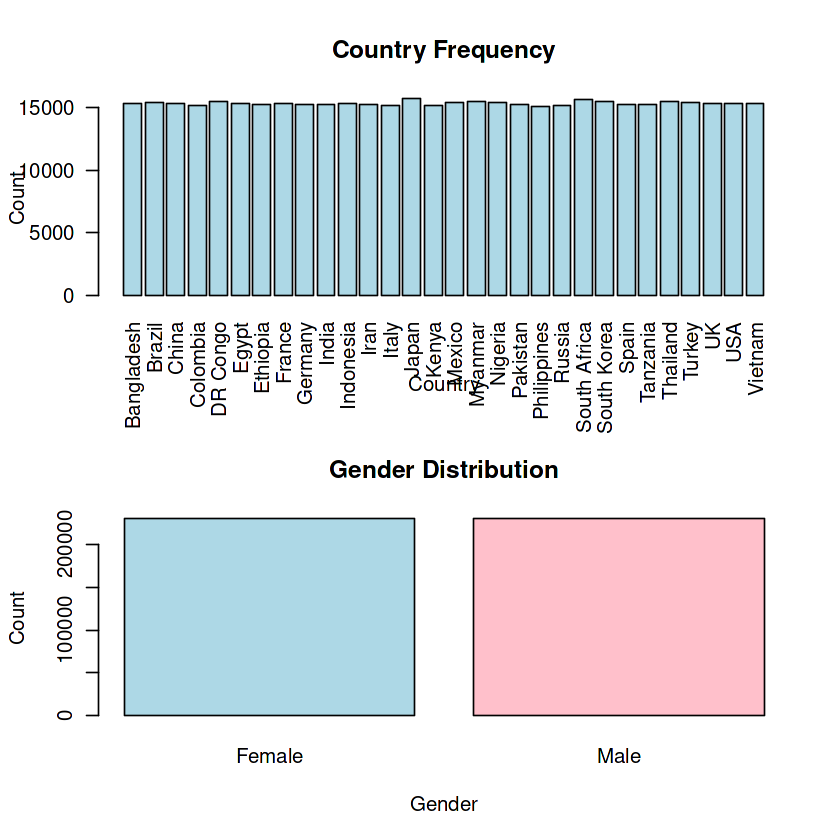

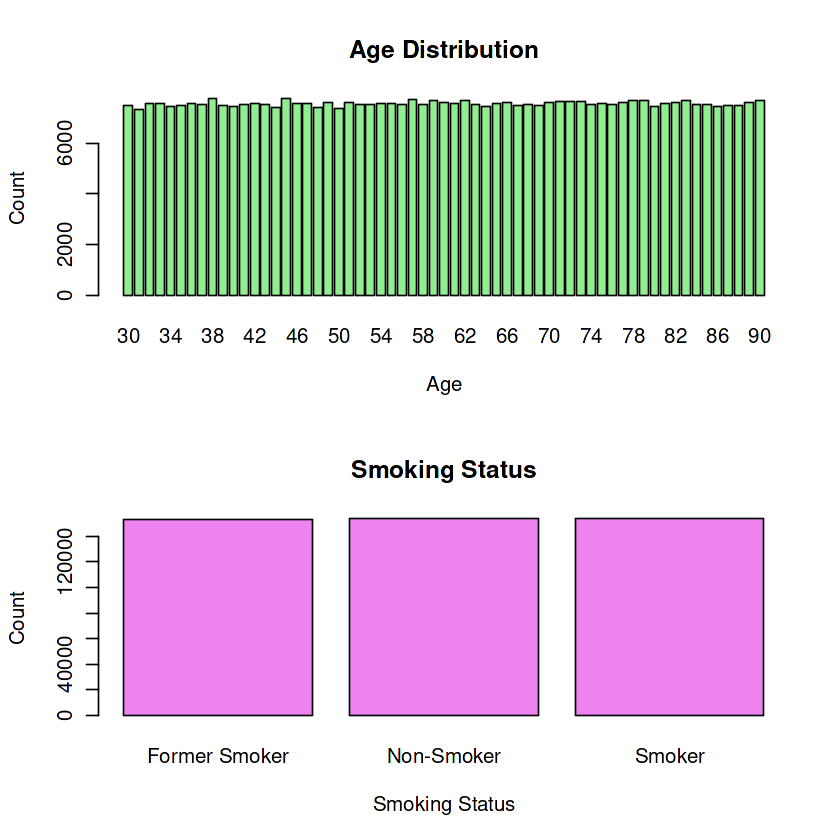

In [53]:
par(mfrow = c(2, 1))

counts <- table(data$Country) 
barplot(counts, main = "Country Frequency", col = "lightblue", 
        xlab = "Country", ylab = "Count", las = 2)

counts2 <- table(data$Gender)  
barplot(counts2, main = "Gender Distribution", col = c("lightblue", "pink"),
        xlab = "Gender", ylab = "Count")

counts3 <- table(data$Age)
barplot(counts3, main = "Age Distribution", col = c("lightgreen"),
        xlab = "Age", ylab = "Count")

counts4 <- table(data$Smoking_Status)
barplot(counts4, main = "Smoking Status", col = c("violet"),
        xlab = "Smoking Status", ylab = "Count")

# **Filling in the Blanks with mode:**

In [54]:
sum(is.na(data$Mutation_Type)) 
sum(is.na(data$Treatment_Access)) 

[1] 138173

[1] 46053

In [56]:
mode_mutation <- names(which.max(table(data$Mutation_Type, useNA = "no")))


data$Mutation_Type[is.na(data$Mutation_Type)] <- mode_mutation


mode_treatment <- names(which.max(table(data$Treatment_Access, useNA = "no")))


data$Treatment_Access[is.na(data$Treatment_Access)] <- mode_treatment

**Sum NA values again:**

In [57]:
sum(is.na(data$Mutation_Type)) 
sum(is.na(data$Treatment_Access)) 

[1] 0

[1] 0

**Let's find the correlation between numerical columns and final prediction. To do that, we need to turn final prediction to a numerical column.**

In [58]:
data$Final_Prediction <- ifelse(data$Final_Prediction == "Yes", 1, 0)

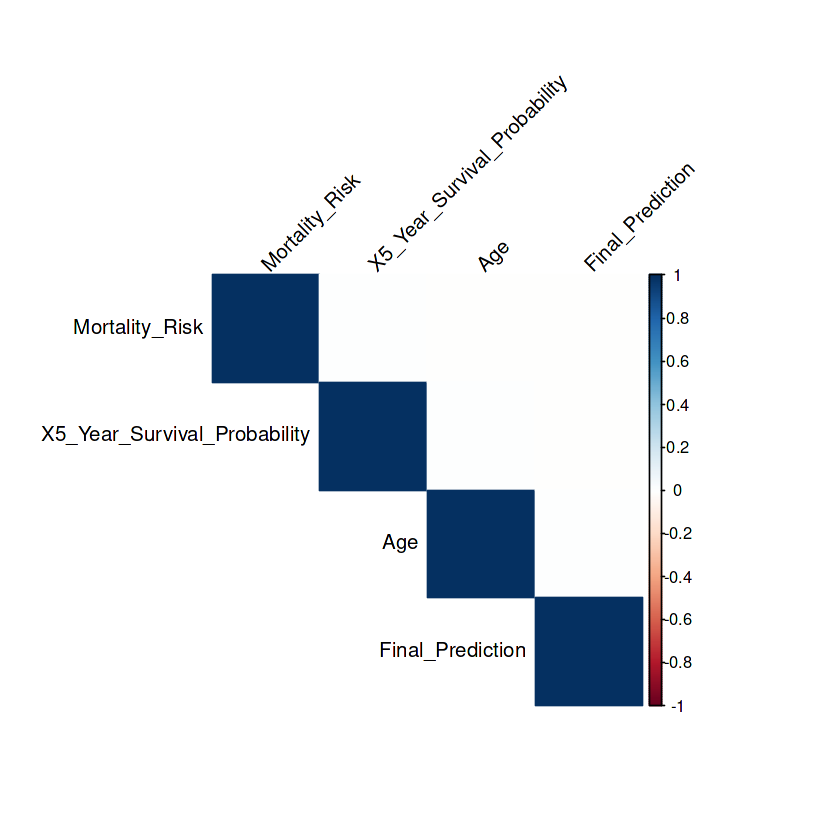

In [59]:
numerical_data <- data[, c("Age","Mortality_Risk","X5_Year_Survival_Probability","Final_Prediction")]

cor_matrix <- cor(numerical_data, use="complete.obs")

# Visualize the correlation matrix
corrplot(cor_matrix, method = "color", type = "upper", order = "hclust",
         tl.col = "black", tl.srt = 45)


**Correlation is almost negligible.**

# **Finding relationships between variables and final prediction or/and Mortality Rate** 

In [18]:
normalized_crosstable_smokingstatus <- prop.table(table(data$Final_Prediction,data$Smoking_Status), margin = 2)

normalized_crosstable_smokingstatus

   
    Former Smoker Non-Smoker    Smoker
  0     0.8000941  0.7991221 0.7999597
  1     0.1999059  0.2008779 0.2000403

In [17]:
normalized.crosstable_socioeconomic_Status <- prop.table(table(data$Final_Prediction,data$Socioeconomic_Status), margin = 2)

normalized.crosstable_socioeconomic_Status

   
         High       Low    Middle
  0 0.7999197 0.7987866 0.8002094
  1 0.2000803 0.2012134 0.1997906

In [18]:
normalized.crosstable_Air_Pollution_Exposure <- prop.table(table(data$Final_Prediction,data$Air_Pollution_Exposure), margin = 2)

normalized.crosstable_Air_Pollution_Exposure

   
         High       Low    Medium
  0 0.7982629 0.7985350 0.8016462
  1 0.2017371 0.2014650 0.1983538

In [19]:
normalized.crosstable_Rural_or_Urban <- prop.table(table(data$Final_Prediction,data$Rural_or_Urban), margin = 2)

normalized.crosstable_Rural_or_Urban

   
        Rural     Urban
  0 0.8014178 0.7989993
  1 0.1985822 0.2010007

**Smoking status, socioeconomic status, air pollution exposure and rural/urban categories all have the same probabiltiy of getting lung cancer. Therefore, these columns do not play a role in the final prediction.**

# **Finding relationships between variables and Mortality Risk**

In [20]:
Aggregate_healthcare = aggregate(Mortality_Risk ~ Healthcare_Access, data = data, FUN = mean)

Aggregate_healthcare

Healthcare_Access,Mortality_Risk
<chr>,<dbl>
Good,0.5006894
Limited,0.4999556
Poor,0.4989090


In [21]:
Aggregate_healthcare = aggregate(Mortality_Risk ~ Treatment_Access	, data = data, FUN = mean)

Aggregate_healthcare

Treatment_Access,Mortality_Risk
<chr>,<dbl>
Full,0.5003504
Partial,0.4995566


In [22]:
Aggregate_Clinical_Trial_Access = aggregate(Mortality_Risk ~ Clinical_Trial_Access	, data = data, FUN = mean)

Aggregate_Clinical_Trial_Access

Clinical_Trial_Access,Mortality_Risk
<chr>,<dbl>
No,0.5001307
Yes,0.5000411


In [23]:
Aggregate_Clinical_Language_Barrier = aggregate(Mortality_Risk ~ Language_Barrier	, data = data, FUN = mean)

Aggregate_Clinical_Language_Barrier

Language_Barrier,Mortality_Risk
<chr>,<dbl>
No,0.4998409
Yes,0.5025524


In [24]:
Aggregate_Clinical_Smoking_Status = aggregate(Mortality_Risk ~ Smoking_Status	, data = data, FUN = mean)

Aggregate_Clinical_Smoking_Status

Smoking_Status,Mortality_Risk
<chr>,<dbl>
Former Smoker,0.5001480
Non-Smoker,0.5000955
Smoker,0.5000951


**There is no relationship between any of these variables and mortality risk either.**

# Let's Build a machine learning algorithm to predict the outcome of lung cancer prediction

In [60]:
set.seed(123)

trainIndex <- createDataPartition(data$Final_Prediction, p = .8,
                                  list = FALSE,
                                  times = 1)

trainData <- data[trainIndex, ]
testData <- data[-trainIndex, ]

**Check dimensions of training and testing datasets**

In [61]:
trainDataShape <- dim(trainData)
print(trainDataShape)

testDataShape <- dim(testData)
print(testDataShape)

[1] 368234     25
[1] 92058    25


**Fit in a logistic regression model**

In [62]:
sum(is.na(trainData))

[1] 0

In [64]:
set.seed(1234)

log_model <- glm(Final_Prediction ~ ., data = trainData, family = binomial(link = "logit"))

pred_prob <- predict(log_model, newdata = testData, type = "response")


custom_threshold <- 0.2

pred_class <- ifelse(pred_prob > custom_threshold, 1, 0)

conf_matrix <- table(Predicted = pred_class, Actual = testData$Final_Prediction)


conf_matrix

         Actual
Predicted     0     1
        0 35929  8836
        1 37795  9498